In [1]:
import pandas as pd
import os
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn import metrics
from time import time

tmp = os.listdir("C:/Users/Alex M/Downloads/SpamAssassinMessages/easy_ham")

ignore warning, code runs properly
x = []

for i in tmp:
    with  open(os.path.join("C:/Users/Alex M/Downloads/SpamAssassinMessages/easy_ham", i), 'r', encoding = "cp437") as f:
        x.append(f.read())
        print(x)

y = [0]*len(x)

df1 = pd.DataFrame(list(zip(x, y)), columns =['text', 'target']) 
df1.head()

tmp = os.listdir("C:/Users/Alex M/Downloads/SpamAssassinMessages/easy_ham_2")

x = []

for i in tmp:
    with  open(os.path.join("C:/Users/Alex M/Downloads/SpamAssassinMessages/easy_ham_2", i), 'r', encoding = "cp437") as f:
        x.append(f.read())
        print(x)

y = [0]*len(x)

df2 = pd.DataFrame(list(zip(x, y)), columns =['text', 'target']) 
df2.head()

tmp = os.listdir("C:/Users/Alex M/Downloads/SpamAssassinMessages/hard_ham")

x = []

for i in tmp:
    with  open(os.path.join("C:/Users/Alex M/Downloads/SpamAssassinMessages/hard_ham", i), 'r', encoding = "cp437") as f:
        x.append(f.read())
        print(x)

y = [0]*len(x)

df3 = pd.DataFrame(list(zip(x, y)), columns =['text', 'target']) 
df3.head()

tmp = os.listdir("C:/Users/Alex M/Downloads/SpamAssassinMessages/spam")

x = []

for i in tmp:
    with  open(os.path.join("C:/Users/Alex M/Downloads/SpamAssassinMessages/spam", i), 'r', encoding = "cp437") as f:
        x.append(f.read())
        print(x)

y = [1]*len(x)

df4 = pd.DataFrame(list(zip(x, y)), columns =['text', 'target']) 
df4.head()

tmp = os.listdir("C:/Users/Alex M/Downloads/SpamAssassinMessages/spam_2")

x = []

for i in tmp:
    with  open(os.path.join("C:/Users/Alex M/Downloads/SpamAssassinMessages/spam_2", i), 'r', encoding = "cp437") as f:
        x.append(f.read())
        print(x)

y = [1]*len(x)

df5 = pd.DataFrame(list(zip(x, y)), columns =['text', 'target']) 
df5.head()

frames = [df1, df2, df3, df4, df5]

final = pd.concat(frames)

final.shape

os.makedirs("C:/Users/Alex M/Downloads/SpamAssassinMessages", exist_ok=True)  
final.to_csv("C:/Users/Alex M/Downloads/SpamAssassinMessages/final.csv") 

In [56]:
final = pd.read_csv(r'C:/Users/Alex M/Downloads/SpamAssassinMessages/final.csv',low_memory = False)

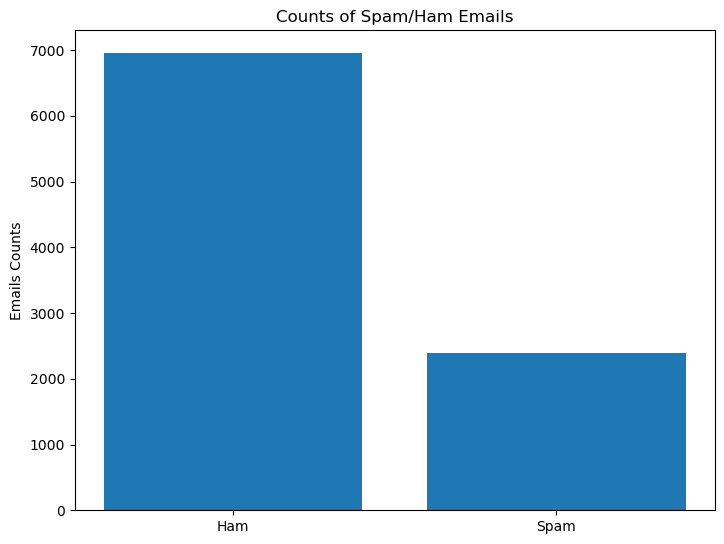

In [57]:
fig = plt.figure()
# plt.figure(figsize=(1,1))
ax = fig.add_axes([0,0,1,1])
labels = ['Ham', 'Spam']
ax.bar(labels,final['target'].value_counts())
plt.ylabel('Emails Counts')
plt.title('Counts of Spam/Ham Emails')
plt.show()


In [31]:
final['target'].value_counts()

0    6954
1    2399
Name: target, dtype: int64

In [32]:
ham_messages = final[final["target"] == 0]
spam_messages  = final[final["target"] == 1]

In [34]:
print(ham_messages.shape)
print(spam_messages.shape)

(6954, 3)
(2399, 3)


In [35]:
ham_downsample = resample(ham_messages,
             replace=True,
             n_samples=len(spam_messages),
             random_state=42)

print(ham_downsample.shape)

(2399, 3)


In [33]:
final.head

<bound method NDFrame.head of       Unnamed: 0                                               text  target
0              0  From exmh-workers-admin@redhat.com  Thu Aug 22...       0
1              1  From Steve_Burt@cursor-system.com  Thu Aug 22 ...       0
2              2  From timc@2ubh.com  Thu Aug 22 13:52:59 2002\n...       0
3              3  From irregulars-admin@tb.tf  Thu Aug 22 14:23:...       0
4              4  From Stewart.Smith@ee.ed.ac.uk  Thu Aug 22 14:...       0
...          ...                                                ...     ...
9348        1393  From tba@insiq.us  Wed Dec  4 11:46:34 2002\nR...       1
9349        1394  Return-Path: <raye@yahoo.lv>\nReceived: from u...       1
9350        1395  From cweqx@dialix.oz.au  Tue Aug  6 11:03:54 2...       1
9351        1396  From ilug-admin@linux.ie  Wed Dec  4 11:52:36 ...       1
9352        1397  mv 00001.317e78fa8ee2f54cd4890fdc09ba8176 0000...       1

[9353 rows x 3 columns]>

In [38]:
final = pd.concat([ham_downsample, spam_messages])
print(final.shape)

(4798, 3)


In [39]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4798 entries, 860 to 9352
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4798 non-null   int64 
 1   text        4798 non-null   object
 2   target      4798 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 149.9+ KB


In [ ]:
# Naive Bayes

In [41]:
x = final['text']
y = final['target']

In [42]:
x.head()

860     From fork-admin@xent.com  Thu Sep 26 11:04:45 ...
5390    From ilug-admin@linux.ie  Mon Aug 12 11:07:18 ...
5226    From ilug-admin@linux.ie  Wed Jul 31 12:31:04 ...
5191    From ilug-admin@linux.ie  Mon Jul 29 11:28:30 ...
3772    From rpm-list-admin@freshrpms.net  Mon Sep 23 ...
Name: text, dtype: object

In [43]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [44]:
X_train = X_train.str.replace("\n"," ")
X_test = X_test.str.replace("\n"," ")

In [45]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
the_count = CountVectorizer()
X = the_count.fit_transform(X_train)

In [46]:
vocab = the_count.vocabulary_
rev = {j:i for i,j in vocab.items()}

In [47]:
nb = MultinomialNB()
nb.fit(X.toarray(),y_train)

MultinomialNB()

In [48]:
x2 = the_count.transform(X_test)
prednb = nb.predict(x2.toarray())

In [49]:
print(classification_report(y_test,prednb))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       807
           1       0.99      0.93      0.96       777

    accuracy                           0.96      1584
   macro avg       0.96      0.96      0.96      1584
weighted avg       0.96      0.96      0.96      1584



<AxesSubplot:>

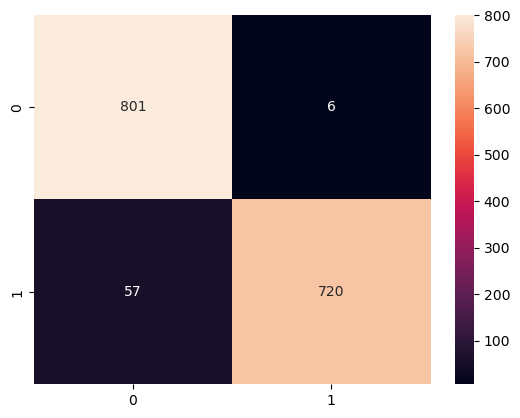

In [50]:
cm = confusion_matrix(y_test,prednb)
sns.heatmap(cm, annot=True, fmt="d")

In [ ]:
# Kmeans Cluster

In [52]:
#from documentation https://scikit-learn.org/stable/auto_examples/text/plot_document_clustering.html#sphx-glr-auto-examples-text-plot-document-clustering-py
#fits and produces various metrics shown below 

labels = y
unique_labels, category_sizes = np.unique(labels, return_counts=True)
true_k = unique_labels.shape[0]

evaluations = []
evaluations_std = []


def fit_and_evaluate(km, X, name=None, n_runs=5):
    name = km.__class__.__name__ if name is None else name

    train_times = []
    scores = defaultdict(list)
    for seed in range(n_runs):
        km.set_params(random_state=seed)
        t0 = time()
        km.fit(X)
        train_times.append(time() - t0)
        scores["Homogeneity"].append(metrics.homogeneity_score(labels, km.labels_))
        scores["Completeness"].append(metrics.completeness_score(labels, km.labels_))
        scores["V-measure"].append(metrics.v_measure_score(labels, km.labels_))
        scores["Adjusted Rand-Index"].append(
            metrics.adjusted_rand_score(labels, km.labels_)
        )
        scores["Silhouette Coefficient"].append(
            metrics.silhouette_score(X, km.labels_, sample_size=2000)
        )
    train_times = np.asarray(train_times)

    print(f"clustering done in {train_times.mean():.2f} ± {train_times.std():.2f} s ")
    evaluation = {
        "estimator": name,
        "train_time": train_times.mean(),
    }
    evaluation_std = {
        "estimator": name,
        "train_time": train_times.std(),
    }
    for score_name, score_values in scores.items():
        mean_score, std_score = np.mean(score_values), np.std(score_values)
        print(f"{score_name}: {mean_score:.3f} ± {std_score:.3f}")
        evaluation[score_name] = mean_score
        evaluation_std[score_name] = std_score
    evaluations.append(evaluation)
    evaluations_std.append(evaluation_std)

In [53]:
vectorizer = TfidfVectorizer(
    max_df=0.5,
    min_df=5,
    stop_words="english",
)

X_tfidf = vectorizer.fit_transform(x)

print(f"n_samples: {X_tfidf.shape[0]}, n_features: {X_tfidf.shape[1]}")

n_samples: 4798, n_features: 16942


In [54]:
kmeans = KMeans(
    n_clusters=2,
    max_iter=100,
    n_init=5,
)

In [55]:
fit_and_evaluate(kmeans, X_tfidf, name="KMeans\non tf-idf vectors")

clustering done in 1.04 ± 0.12 s 
Homogeneity: 0.166 ± 0.000
Completeness: 0.217 ± 0.000
V-measure: 0.188 ± 0.000
Adjusted Rand-Index: 0.140 ± 0.000
Silhouette Coefficient: 0.057 ± 0.002


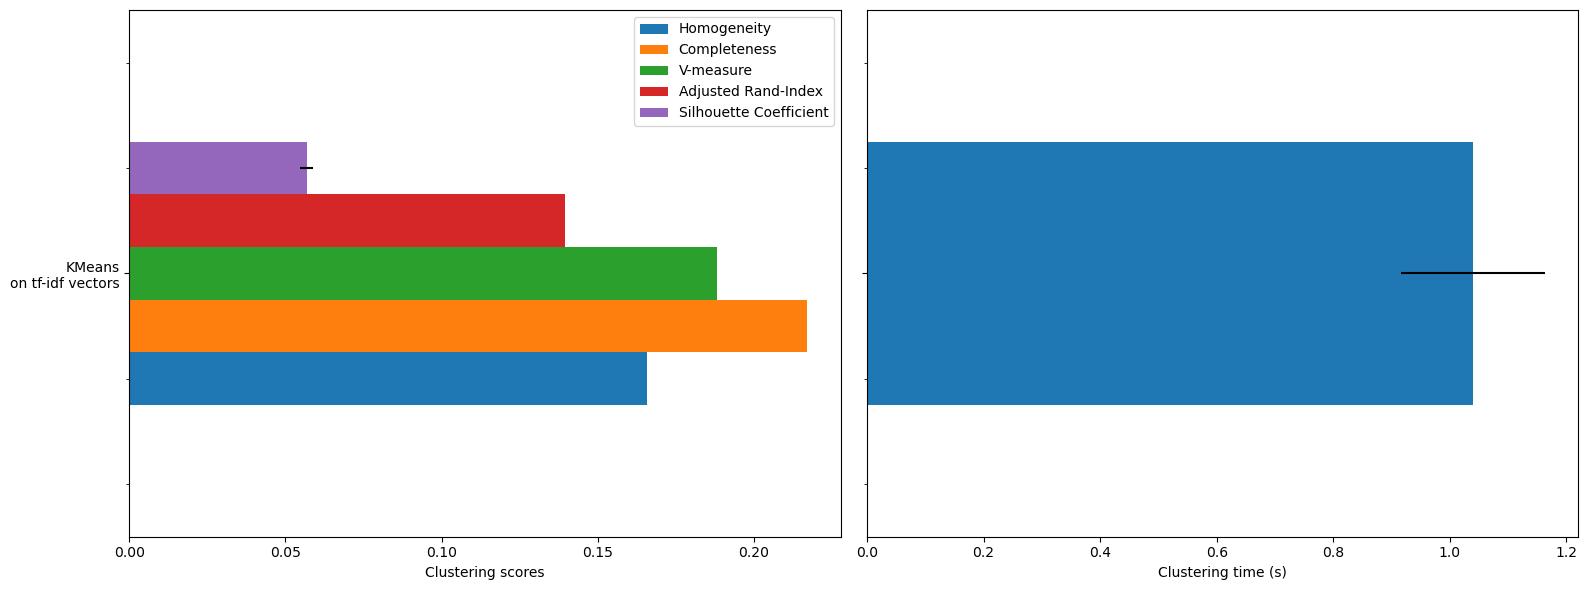

In [62]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(16, 6), sharey=True)

df = pd.DataFrame(evaluations[::-1]).set_index("estimator")
df_std = pd.DataFrame(evaluations_std[::-1]).set_index("estimator")

df.drop(
    ["train_time"],
    axis="columns",
).plot.barh(ax=ax0, xerr=df_std)
ax0.set_xlabel("Clustering scores")
ax0.set_ylabel("")

df["train_time"].plot.barh(ax=ax1, xerr=df_std["train_time"])
ax1.set_xlabel("Clustering time (s)")
plt.tight_layout()
